In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image, ImageFilter
%matplotlib inline
import pywt
from matplotlib.image import imread

In [2]:
image=cv2.imread('Y8.jpg')

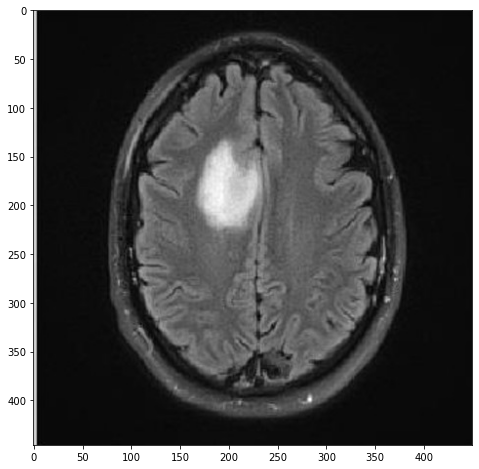

In [3]:
plt.figure(figsize=(20,8))
plt.imshow(image)

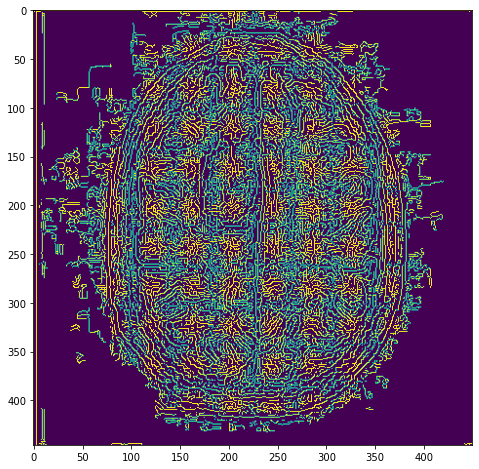

In [5]:
original_noise = cv2.Canny(image,2,15)
plt.figure(figsize=(20,8))
plt.imshow(original_noise)

In [7]:
mean_blur = cv2.blur(image, (5,5))

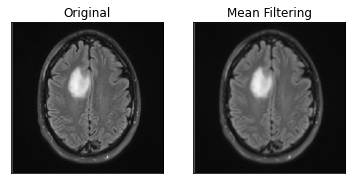

In [19]:
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(mean_blur),plt.title('Mean Filtering')
plt.xticks([]), plt.yticks([])
plt.show()

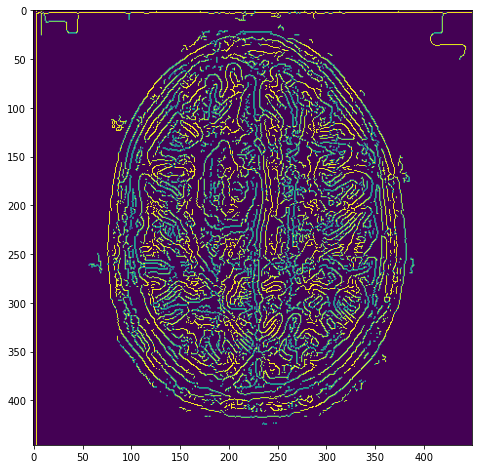

In [9]:
mean_noise = cv2.Canny(mean_blur,2,15)
plt.figure(figsize=(20,8))
plt.imshow(mean_noise)

In [18]:
from math import log10, sqrt
import cv2
import numpy as np
from PIL import Image # No need for ImageChops
import math
from skimage import img_as_float
from skimage.measure import compare_mse as mse
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def rmsdiff(im1, im2):
    """Calculates the root mean square error (RSME) between two images"""
    return math.sqrt(mse(img_as_float(im1), img_as_float(im2)))

def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

def main():
     original = cv2.imread("Y8.jpg")
     compressed = mean_blur
     value = PSNR(original, compressed)
     print(f"PSNR value is {value} dB")
     value2=rmsdiff(mean_blur,image)
     print(f"RMSE value is {value2}")
     value3=ssim(mean_blur,image)
     print(f"SSIM value is {value3}")  
if __name__ == "__main__":
    main()

PSNR value is 35.760956138201145 dB
RMSE value is 0.04636002601832961
SSIM value is 0.9175178881125843


<ipython-input-18-e810fd3d36f1>:20: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  return math.sqrt(mse(img_as_float(im1), img_as_float(im2)))


***************************************************************************
***************************************************************************
***************************************************************************
***************************************************************************
***************************************************************************
***************************************************************************
***************************************************************************
***************************************************************************
***************************************************************************
***************************************************************************

In [21]:
image2 = cv2.imread('Y1.jpg')

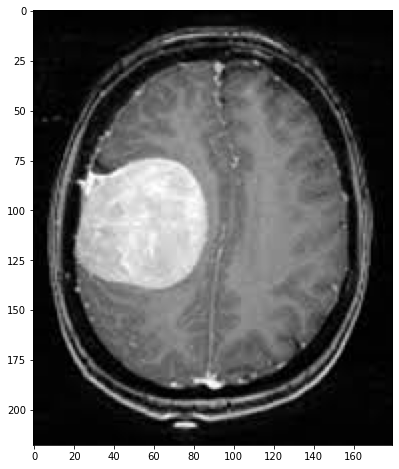

In [23]:
plt.figure(figsize=(20,8))
plt.imshow(image2)

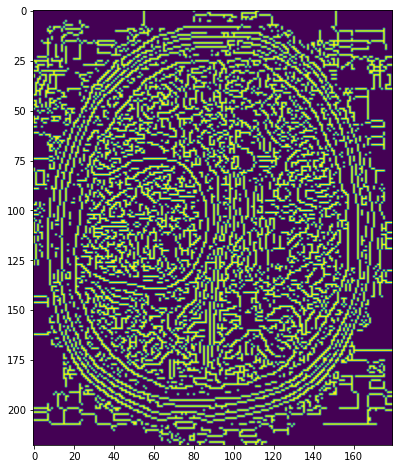

In [24]:
original_noise = cv2.Canny(image2,2,15)
plt.figure(figsize=(20,8))
plt.imshow(original_noise)


In [26]:
mean_blur2 = cv2.blur(image2, (5,5))


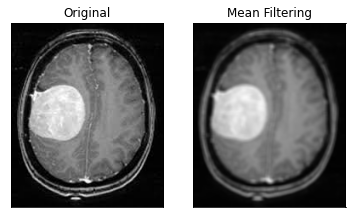

In [28]:
plt.subplot(121),plt.imshow(image2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(mean_blur2),plt.title('Mean Filtering')
plt.xticks([]), plt.yticks([])
plt.show()

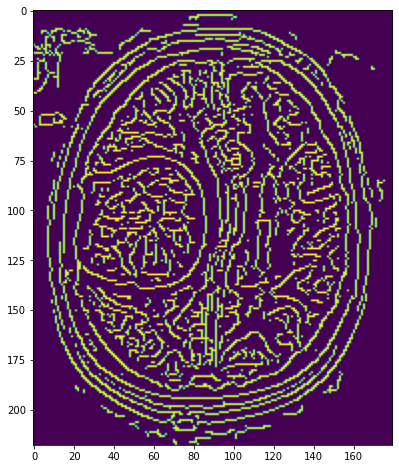

In [29]:
mean_noise2 = cv2.Canny(mean_blur2,2,15)
plt.figure(figsize=(20,8))
plt.imshow(mean_noise2)

In [31]:
from math import log10, sqrt
import cv2
import numpy as np
from PIL import Image # No need for ImageChops
import math
from skimage import img_as_float
from skimage.measure import compare_mse as mse
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def rmsdiff(im1, im2):
    """Calculates the root mean square error (RSME) between two images"""
    return math.sqrt(mse(img_as_float(im1), img_as_float(im2)))

def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

def main():
     original = cv2.imread("Y1.jpg")
     compressed = mean_blur2
     value = PSNR(original, compressed)
     print(f"PSNR value is {value} dB")
     value2=rmsdiff(mean_blur2,image2)
     print(f"RMSE value is {value2}")
     value3=ssim(mean_blur2,image2)
     print(f"SSIM value is {value3}")  
if __name__ == "__main__":
    main()

PSNR value is 32.06565054048889 dB
RMSE value is 0.05777390651877405
SSIM value is 0.7697357707803809


<ipython-input-31-7258bf035a4e>:20: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  return math.sqrt(mse(img_as_float(im1), img_as_float(im2)))
